### 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [58]:
import matplotlib.pyplot as plt

### 프로젝트 개요
> corona 기간 : 2020-03-10 ~ 2022.02.28

> CTI 지수 포함 변수 
  
> [상관관계 분석 할 종목들]  
바이오(제약), 헬스&케어, 항공주, 여행주,화물(운송)주, 주류, 홈인테리어주   

> [상관관계 분석할 다른 상품]  
    금,환율,유가 



_________________________________________________________________

### 데이터 가져오기 

#### corona data / stock data

In [31]:
df = pd.read_csv('./corona.csv', encoding='utf-8')

In [49]:
df_rg= pd.read_excel('./regulation.xlsx')
df_rg.rename(columns={'날짜':'Date','거리두기 단계':'Level'},inplace=True)
#df_rg['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

In [ ]:
Kospi = fdr.DataReader('KS11') 
Kodaq = fdr.DataReader('KQ11')

### Preprocessing

#### corona data

In [36]:
df.columns = ["1", 'Date', 'DeadCnt', 'ConfirmedCnt', "2", "3", "4", "5", "6", "7"]
df.drop([str(i) for i in range(1,8)],axis=1,inplace=True) # Drop Unecessary Columns
df = df.sort_values('Date') # Sorting DATE
df['DailyDeadCnt'] = (df['DeadCnt']-df['DeadCnt'].shift(1)).fillna(0) # Create DailyDeadCnt by using difference & fill NAN by 0
df['DailyConfirmedCnt'] = (df['ConfirmedCnt']-df['ConfirmedCnt'].shift(1)).fillna(0) # Create DailyConfirmedCnt by using difference & fill NAN by 0
df['D/C(%)'] = (df['DeadCnt']/df['ConfirmedCnt'])*100 # Create D/C
df.drop(['DeadCnt','ConfirmedCnt'],axis=1,inplace=True) # Drop Unecessary Columns
df.reset_index(drop=True, inplace=True) # Reset index
df['Date'] = df['Date'].str[0:4] + "-" + df['Date'].str[5:7] + "-" +df['Date'].str[8:10] # Change Date style YYYY-MM-DD
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True) # Change datatype f

In [53]:
df = pd.merge(df,df_rg,left_on='Date', right_on ='Date', how='left') #기존 corona data 에 거리두기단계 데이터 추가 

In [55]:
df['Level'].fillna(3,inplace=True) #3월초 결측값 3단계로 채움 
df

,Date,DailyDeadCnt,DailyConfirmedCnt,D/C(%),Level
0,2020-03-10,0.0,0.0,0.718754,3.0
1,2020-03-11,6.0,242.0,0.773694,3.0
2,2020-03-12,6.0,114.0,0.838734,3.0
3,2020-03-13,1.0,110.0,0.839704,3.0
4,2020-03-14,5.0,107.0,0.890428,3.0
...,...,...,...,...,...
715,2022-02-24,82.0,170015.0,0.307660,2.0
716,2022-02-25,94.0,165887.0,0.292037,2.0
717,2022-02-26,112.0,166201.0,0.278850,2.0
718,2022-02-27,49.0,163555.0,0.265257,2.0


#### stock data

In [56]:
df_c = df
sp_str = ['Kospi', 'Kosdq']
sp_df = [Kospi, Kodaq]

for i, col in enumerate(sp_df): # Merge Kospi & Kodaq into df_c
    corona_df = pd.merge(df_c, col['Close'], left_on='Date', right_on=col.index, how='inner')
    corona_df.rename(columns={'Close': sp_str[i]}, inplace=True)
    df_c = corona_df

In [57]:
corona_df

,Date,DailyDeadCnt,DailyConfirmedCnt,D/C(%),Level,Kospi,Kosdq
0,2020-03-10,0.0,0.0,0.718754,3.0,1962.93,619.97
1,2020-03-11,6.0,242.0,0.773694,3.0,1908.27,595.61
2,2020-03-12,6.0,114.0,0.838734,3.0,1834.33,563.49
3,2020-03-13,1.0,110.0,0.839704,3.0,1771.44,524.00
4,2020-03-16,0.0,74.0,0.910636,3.0,1714.86,504.51
...,...,...,...,...,...,...,...
481,2022-02-22,58.0,99569.0,0.347958,2.0,2706.79,868.11
482,2022-02-23,99.0,171442.0,0.326597,2.0,2719.53,877.33
483,2022-02-24,82.0,170015.0,0.307660,2.0,2648.80,848.21
484,2022-02-25,94.0,165887.0,0.292037,2.0,2676.76,872.98


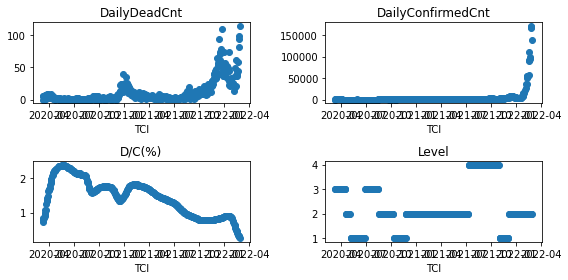

In [83]:
plt.figure(figsize=(8,4))
for i, col in enumerate(corona_df.columns[1:5]):    
    
    plt.subplot(2,2,i+1)
    plt.scatter(x=corona_df['Date'],y=corona_df[col])
    plt.title(col)
    plt.xlabel('TCI')
    plt.tight_layout()
    
# 전처리로 평활화?? 혹은 가중치 조정 필요해 보임 
# 회귀분석을 하려면 변수들이 정규분포를 보여야함......

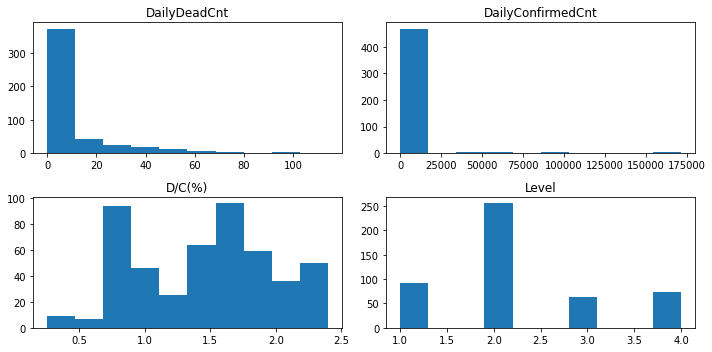

In [69]:
plt.figure(figsize=(10,5))
for i, col in enumerate(corona_df.columns[1:5]):    
    
    plt.subplot(2,2,i+1)
    plt.hist(corona_df[col])
    plt.title(col)
    #plt.xlabel()
    plt.tight_layout()

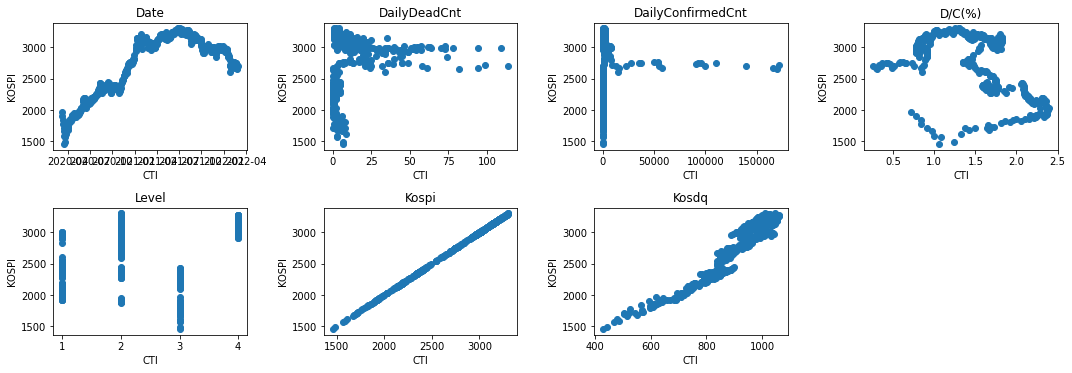

In [59]:
plt.figure(figsize=(15,10))
for i, col in enumerate(corona_df.columns):    
    
    plt.subplot(4,4,i+1)
    plt.scatter(corona_df[col],corona_df['Kospi'])
    plt.title(col)
    plt.ylabel('KOSPI', size=10)
    plt.xlabel('CTI',size=10)
    plt.tight_layout()
    

In [61]:
corr = corona_df.corr()
corr
# 우선 Regression 모델 만들어서 회귀모형 돌려보기 

,DailyDeadCnt,DailyConfirmedCnt,D/C(%),Level,Kospi,Kosdq
DailyDeadCnt,1.000000,0.562670,-0.578671,-0.108192,0.213057,0.250230
DailyConfirmedCnt,0.562670,1.000000,-0.397775,-0.038542,0.028319,0.008087
D/C(%),-0.578671,-0.397775,1.000000,-0.335290,-0.539559,-0.535703
Level,-0.108192,-0.038542,-0.335290,1.000000,0.210047,0.179154
Kospi,0.213057,0.028319,-0.539559,0.210047,1.000000,0.956166
Kosdq,0.250230,0.008087,-0.535703,0.179154,0.956166,1.000000


In [80]:
corona_feature = corona_df.iloc[:,1:4]

### LinearRegression

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)

X_train, X_test, y_train, y_test = train_test_split(corona_feature,corona_df['Kospi'], test_size = 0.2)
model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [82]:
print(f'학습 데이터 점수:{model.score(X_train,y_train)}')
print(f'test 데이터 점수:{model.score(X_test,y_test)}')

학습 데이터 점수:0.33143887687652807
test 데이터 점수:0.3401302540694121


### TCI 만들기 